In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from framework_pkg.framework import FrameWork
from framework_pkg.framework import bin_prediction, ideal_exposure

plt.rcParams['text.usetex']=True
plt.style.use('classic')

Warning!: Python module pyslha not found, disabling slha reading routines


In [2]:
fw_total = FrameWork(threshold=3.5, bin_max=13, lat=36, efficiency_correction=False, resolution_correction=False)

""" expected event rate per day per 32.5 kilo ton assuming no oscillation 
(The value should be matched with 294.7 per day per 32.5 kilo ton) """

mc_expected_event = fw_total.unoscillated_expected_event_rate
print(mc_expected_event)

[294.6329475]


In [3]:
""" predicted fraction of total signal in comparsion to expected unoscillation total signal """
fw_total = FrameWork(threshold=3.5, bin_max=13, lat=36, efficiency_correction=True, resolution_correction=False)
total_days = fw_total.time_day
experiment_lat = fw_total.lat


param ={'SinT12'    : 0.308,
        'mu1'       : 0.,
        'mu2'       : 0.0, 
        'mu3'       : 0.  ,
        'mdm'       : 4.98 * 2e-4, 
        'alpha'     : 0.  , #0-pi
        'eps'       : 0.  , #0-1
        'alpha_eps' : 0.  , #0-pi
        'M12'       : 6.9e-5 }


msw_raw_result = fw_total.__getitem__(param) 

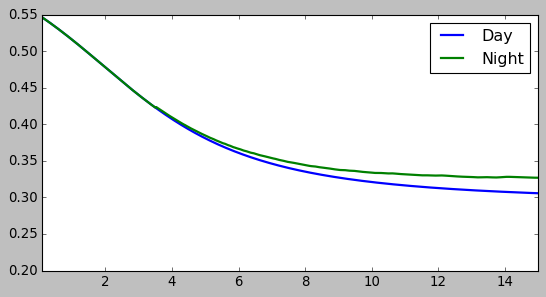

In [4]:
plt.figure(figsize=(8,4))
plt.ylim(0.2,0.55)
plt.xlim(1e-1,15)
#plt.xscale('log')

periods = fw_total.time_periods

for period in periods:
    plt.plot(fw_total.energy_nu, np.mean(fw_total.pee[period],axis=0), lw =2)

plt.legend(['Day', 'Night'])

In [5]:
a_best = np.loadtxt('./Data/best_fit_8_91.txt')
param['SinT12'] = a_best[0]
param['M12'] = a_best[1] * 1e-5
param['mu2'] = a_best[2]
param['alpha'] = a_best[3]
param['eps'] = a_best[4]
param['alpha_eps'] = a_best[5]
param['mdm'] = 0.8*2e-4#a_best[7] * 2e-4

uldm_raw_result = fw_total.__getitem__(param) 

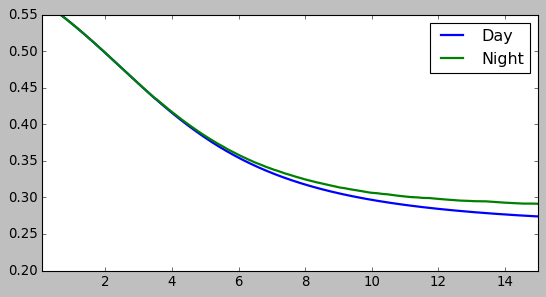

In [6]:
plt.figure(figsize=(8,4))
plt.ylim(0.2,0.55)
plt.xlim(1e-1,15)
#plt.xscale('log')

periods = fw_total.time_periods

for period in periods:
    plt.plot(fw_total.energy_nu, np.mean(fw_total.pee[period],axis=0), lw =2)

plt.legend(['Day', 'Night'])

In [8]:
'''
eexperiment exposure file must be numpy array with shape (n,4), n is the number of days, 4 : bin num, day num, T_day, T_night
'''
exposure = ideal_exposure(experiment_lat)

R_bin_day, R_bin_night, R_bin_total = bin_prediction(msw_raw_result, exposure, total_days)
print(R_bin_day, R_bin_night, R_bin_total)
print()
dn_asymmetry = 2 * (R_bin_day - R_bin_night) / (R_bin_night + R_bin_day)
print(dn_asymmetry)

print('-------------------')
R_bin_day, R_bin_night, R_bin_total = bin_prediction(uldm_raw_result, exposure, total_days)
print(R_bin_day, R_bin_night, R_bin_total)
print()
dn_asymmetry = 2 * (R_bin_day - R_bin_night) / (R_bin_night + R_bin_day)
print(dn_asymmetry)



[[2.2740514]] [[2.3410693]] [[2.30768199]]

[[-0.02904275]]
-------------------
[[2.16017756]] [[2.21469427]] [[2.18753486]]

[[-0.02492265]]


In [21]:
fw_total = FrameWork(threshold=4.5, bin_max=13, lat=36, efficiency_correction=True, resolution_correction=False)
total_days = fw_total.time_day
experiment_lat = fw_total.lat

param ={'SinT12'    : 0.308,
        'mu1'       : 0.,
        'mu2'       : 0.0, 
        'mu3'       : 0.  ,
        'mdm'       : 4.98 * 2e-4, 
        'alpha'     : 0.  , #0-pi
        'eps'       : 0.  , #0-1
        'alpha_eps' : 0.  , #0-pi
        'M12'       : 6.9e-5 }


msw_raw_result = fw_total.__getitem__(param) 


a_best = np.loadtxt('./Data/best_fit_8_91.txt')
param['SinT12'] = a_best[0]
param['M12'] = a_best[1] * 1e-5
param['mu2'] = a_best[2]
param['alpha'] = a_best[3]
param['eps'] = a_best[4]
param['alpha_eps'] = a_best[5]
param['mdm'] = 0.8*2e-4#a_best[7] * 2e-4

uldm_raw_result = fw_total.__getitem__(param) 

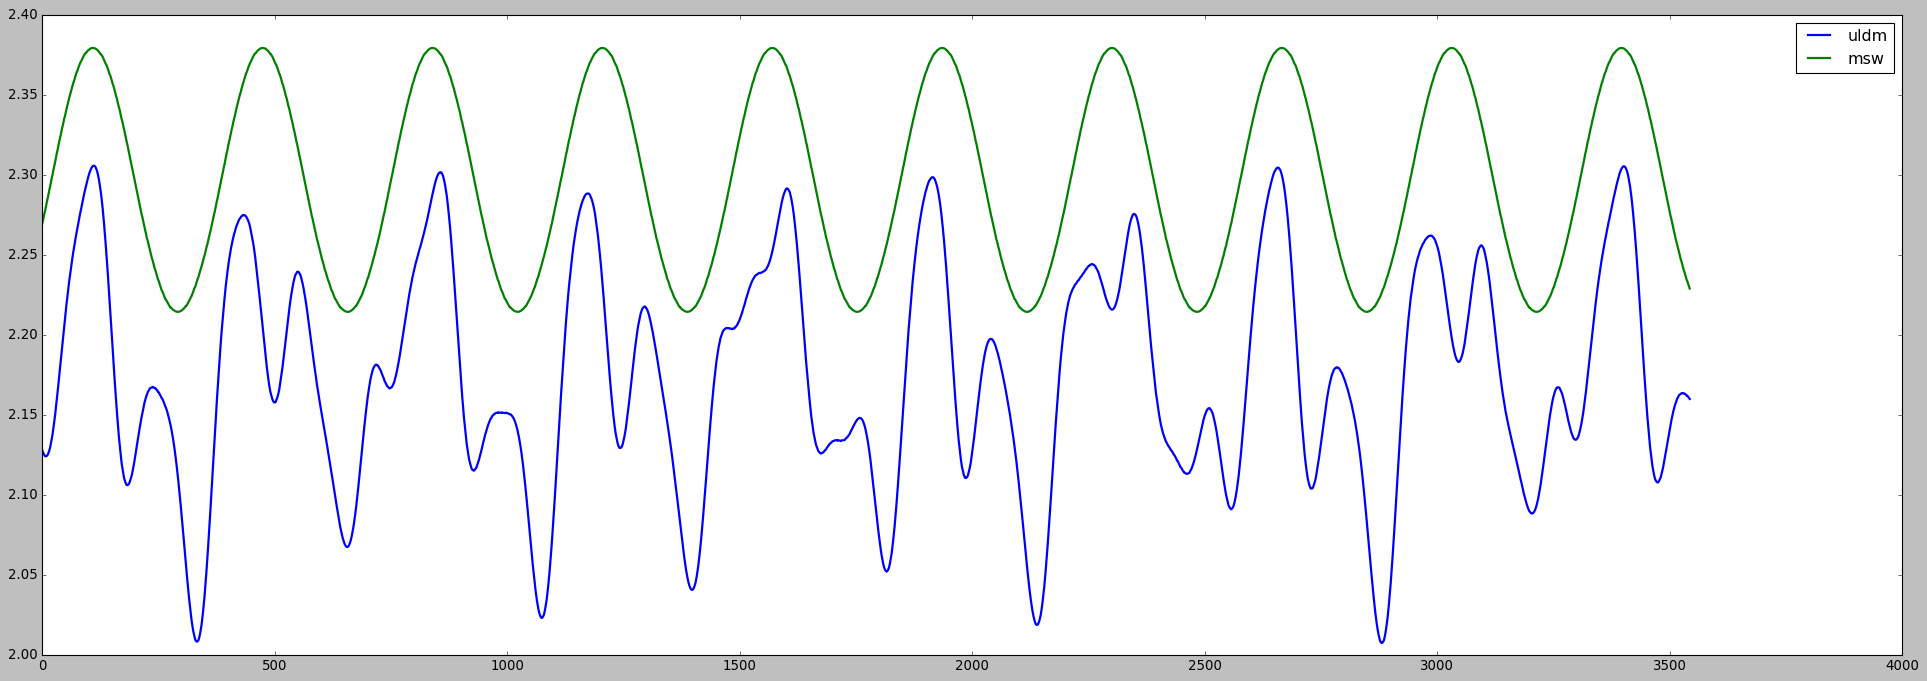

In [22]:
exposure = ideal_exposure(experiment_lat, one_bin=False, dwontime=0)

_, _, R_bin_total_ideal_msw  = bin_prediction(msw_raw_result, exposure, total_days)
_, _, R_bin_total_ideal_uldm = bin_prediction(uldm_raw_result, exposure, total_days)
time_bins = np.unique(exposure[:,0])

plt.figure(figsize=(30,10))

plt.plot(time_bins, R_bin_total_ideal_uldm[:,0], lw=2)
plt.plot(time_bins, R_bin_total_ideal_msw[:,0], lw=2)

plt.legend(['uldm', 'msw'])

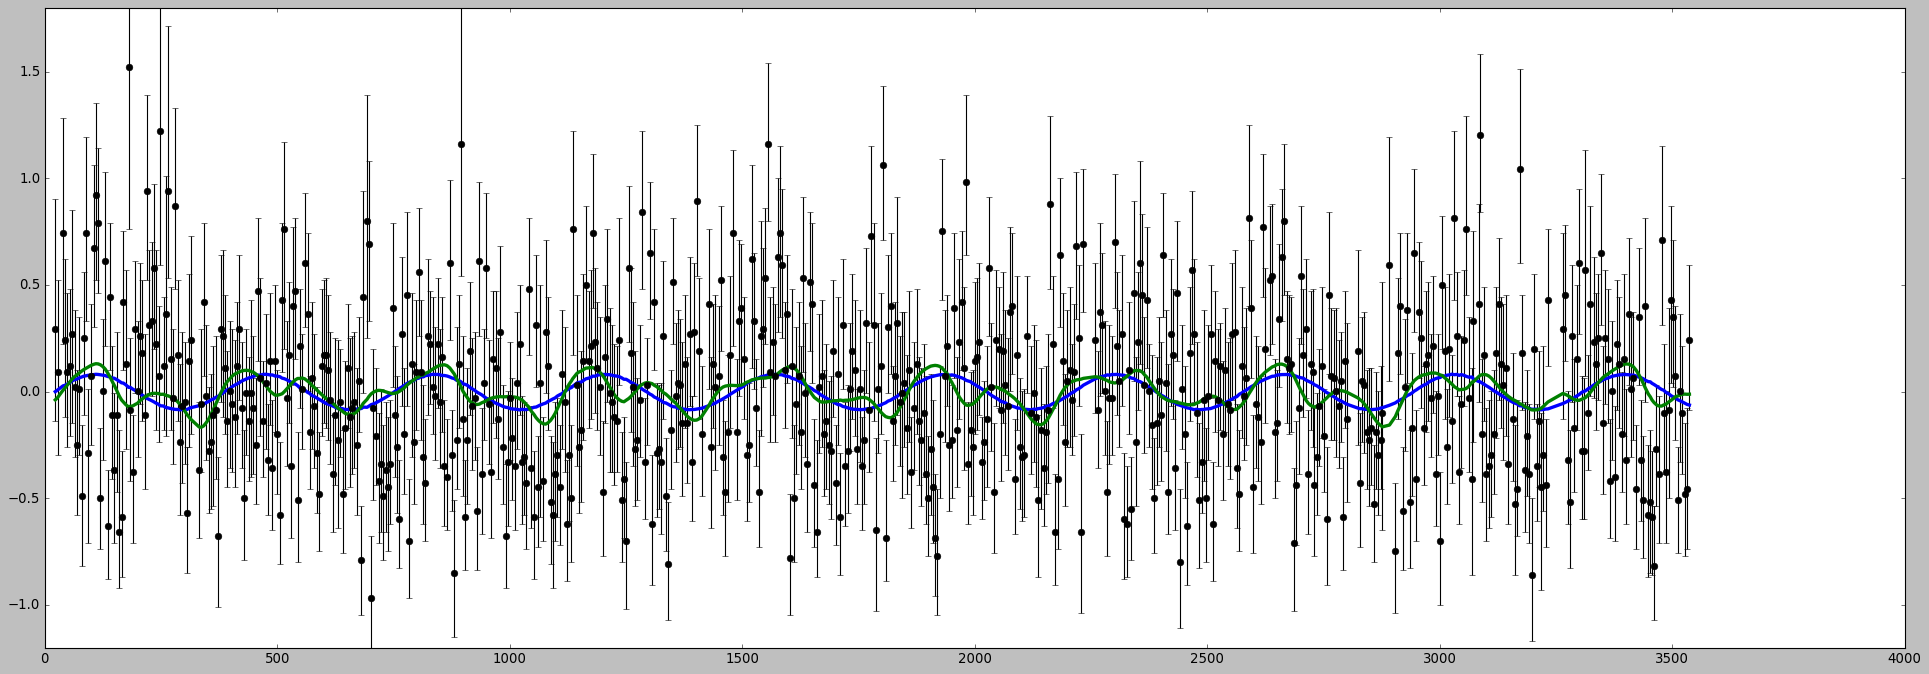

In [23]:
exposure = np.loadtxt('./Data/time_exposures_1.txt') 

_, _, R_bin_total_real_msw = bin_prediction(msw_raw_result, exposure, total_days)
_, _, R_bin_total_real_uldm = bin_prediction(uldm_raw_result, exposure, total_days)


plt.figure(figsize=(30,10))
plt.ylim(-1.2,1.8)

data = np.loadtxt('./Data/modulation_data.txt')
mean_data = np.mean(data[:,1])
plt.errorbar(data[:,0], data[:,1] - mean_data, np.array((data[:,3],data[:,2])), fmt='ko')

plt.plot(data[:,0], R_bin_total_real_msw[:,0] - np.mean(R_bin_total_real_msw[:,0]), lw =3)
plt.plot(data[:,0], R_bin_total_real_uldm[:,0] - np.mean(R_bin_total_real_uldm[:,0]), lw = 3)
